<a href="https://colab.research.google.com/github/sanketgoyal/Deep_Learning/blob/master/CNN_MNIST_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
 
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
 
from keras.models import Model
np.random.seed(0)




In [15]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

(60000, 28, 28)
(10000, 28, 28)


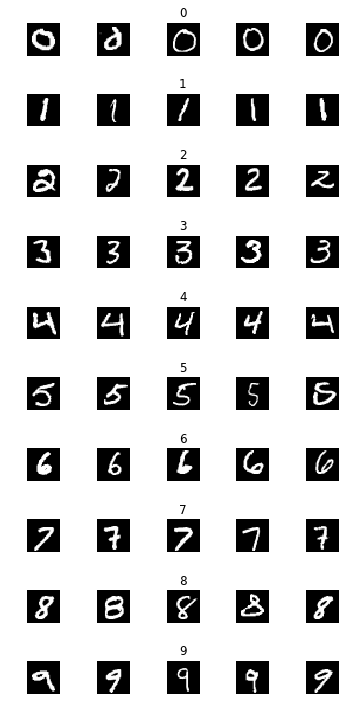

In [16]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


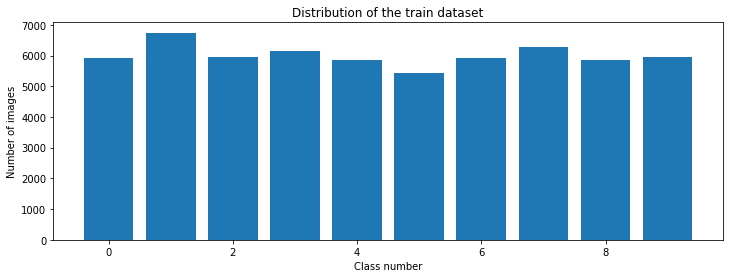

In [17]:

print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()
 


X_train = X_train.reshape(60000, 28, 28, 1) #Adding depth to the data
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
 
X_train = X_train/255
X_test = X_test/255

In [0]:
#Define the leNet model
def leNet_model():
  model = Sequential() #Defining the model with the sequential class
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu')) #Filters = 30, Tuple to define size = (5, 5)
  #Thus there are 780 updatable parameters. Bias = 30 plus 5*5 kernal with 30 filters
  #More arguments like Padding and Stride can be added in the above line
  
  model.add(MaxPooling2D(pool_size=(2, 2)))
  #Now the shape of image changes to 12*12*30 
  
  model.add(Conv2D(15, (3, 3), activation='relu')) #Parameters in total = 15*30*3*3 = 4050 + 15 bias = 4065
  #Now the shape of image changes to 10*10*15
  
  model.add(MaxPooling2D(pool_size=(2, 2))) #Now the shape of image changes to 5*5*15

  
  model.add(Flatten()) #now it is 1D array of shape 375
  model.add(Dense(500, activation='relu')) #Low number is less accuracy and high number is more computational power
  model.add(Dropout(0.5)) #Help reduce overfitting by setting fraction or rate of input units to zero at each update during training
                          #Zero meaning no input nodes are dropped and one meaning all nodes are dropped
  model.add(Dense(num_classes, activation='softmax'))
  #Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [19]:
model = leNet_model()
print(model.summary())

W0720 21:01:00.724996 139882968520576 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               188000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
__________

In [20]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.2479 - acc: 0.9198 - val_loss: 0.0491 - val_acc: 0.9862
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0697 - acc: 0.9781 - val_loss: 0.0350 - val_acc: 0.9890
Epoch 3/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0590 - acc: 0.9819 - val_loss: 0.0401 - val_acc: 0.9885
Epoch 4/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0536 - acc: 0.9839 - val_loss: 0.0393 - val_acc: 0.9883
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0449 - acc: 0.9866 - val_loss: 0.0342 - val_acc: 0.9903
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.0448 - acc: 0.9854 - val_loss: 0.0394 - val_acc: 0.9888
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.0423 - acc: 0.9871 - val_loss: 0.0309 - val_acc:

Text(0.5, 0, 'epoch')

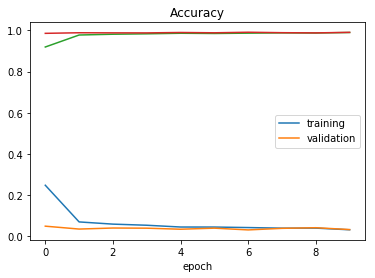

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')
 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')


In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
 
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.029477468530688066
Test accuracy: 0.9919


(1, 28, 28, 1)
(1, 28, 28, 1)
predicted digit: [3]


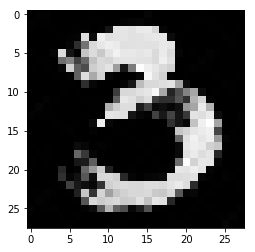

In [23]:
#predict internet number
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
#url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
 
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))
 
img = img/255
img = img.reshape(1,28,28,1)
print(img.shape)
 
print(img.shape)
print("predicted digit: "+str(model.predict_classes(img)))
 

(1, 24, 24, 30)
(1, 10, 10, 15)


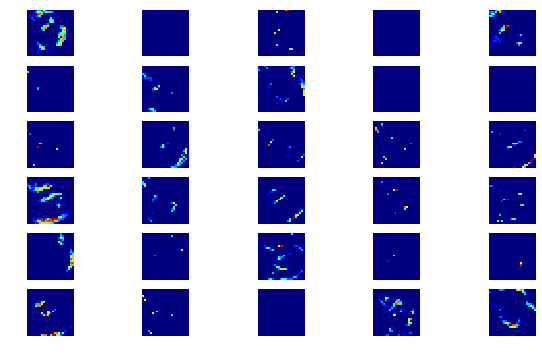

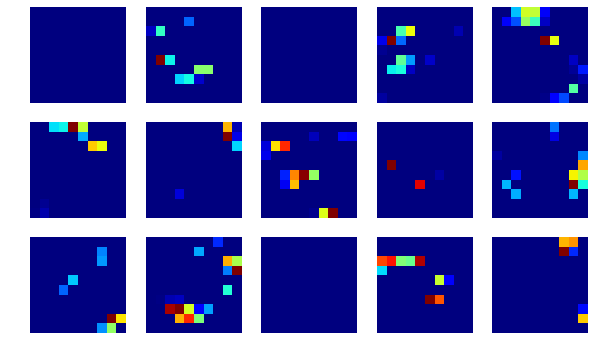

In [24]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output) #Gives input and ouputs of the first conv layer
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output) #Gives input and ouputs of the second conv layer
 
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
 
print(visual_layer1.shape)
print(visual_layer2.shape)
 
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')